In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#
# Concept of Significance in Statistics (  Significance Level ) (p-value)
# ====================================================================================================================
#
# Significance Level is a statistical terms to define the tolerance of error in your Statistical Modelling
# or Statistical Testing. This concept is applicable for both Descriptive and Inferential Statistics.
#
# Ask yourself one simple question: How much error can you tolerate in your hypothesis?
# In the world of stats, it all about approx. So technically you can never get 100% accurate result. Though you can 
# increase your bar by defining your hypothesis the level of error tolerance you defined in the deployed report/model.
#
# I can tolerate 1% error ----> 99% confidence
# 
# Significance Level : 0.01  -----> 1% error tolerance ----> 99% confidence
#                    : 0.05  -----> 5% error Tolerance ----> 95% confidence (Model)
#                    : 0.1   -----> 10% error Tolerance ---> 90% confidence (Strategy Creation)
#
#   Confidence Intervals
#   Significance Level


## Correlation test

In [ ]:
# 50_Startups 
# Feature: R&D Spend, Admin Spend, Marketing
# Label: Profit
#
# We test the relationship between each feature and label
#
#

In [ ]:
# Question: Do R&D Spend and Profit have any linear relationship?
# 
# Hypoythesis Testing:
#
# Lets assume my SL is 0.05
#
# Null Hypothesis:       R&D Spend and Profit doesnot have Linear Relationship : if calc_SL > assumed_SL
# Alternate Hypothesis:  R&D Spend and Profit have Linear Relationship : if calc_SL <= assumed_SL
#
#
#
# To perform the test of above hypothesis, we shall choose any/all of the given algo
# 1. Pearsons Correlation Coeff
# 2. Spearmans Rank test
# 3. Kendall's Rank test
#
# 
# 

In [ ]:
# 1. Pearsons Correlation Coeff
from scipy.stats import pearsonr

corr,pvalue = pearsonr(data['R&D Spend'],data['Profit'])

if pvalue <= 0.05:
    print("Alternate Hypothesis Passed. R&D Spend and Profit have Linear Relationship")
else:
    print("Null Hypothesis Passed. R&D Spend and Profit doesnot have Linear Relationship")

Alternate Hypothesis Passed. R&D Spend and Profit have Linear Relationship


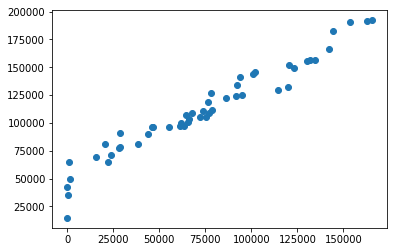

In [ ]:
#For Understanding --- Will be covered in detail next week 
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data['R&D Spend'],data['Profit'])

In [ ]:
# 2. Spearmans Rank test
from scipy.stats import spearmanr

corr,pvalue = spearmanr(data['R&D Spend'],data['Profit'])

if pvalue <= 0.05:
    print("Alternate Hypothesis Passed. R&D Spend and Profit have Linear Relationship")
else:
    print("Null Hypothesis Passed. R&D Spend and Profit doesnot have Linear Relationship")

Alternate Hypothesis Passed. R&D Spend and Profit have Linear Relationship


In [ ]:
# 3. Kendall's Rank test
from scipy.stats import kendalltau

corr,pvalue = kendalltau(data['R&D Spend'],data['Profit'])

if pvalue <= 0.05:
    print("Alternate Hypothesis Passed. R&D Spend and Profit have Linear Relationship")
else:
    print("Null Hypothesis Passed. R&D Spend and Profit doesnot have Linear Relationship")

Alternate Hypothesis Passed. R&D Spend and Profit have Linear Relationship


# Normality Test
To test whether the given column is Gaussian Distributed(Normally Distributed) or Not

In [ ]:
# 50_Startups 
# Feature: R&D Spend, Admin Spend, Marketing
# Label: Profit
#
# If R&D Spend, Admin Spend and Marketing Gaussian Distributed
#
#
# Two reason:
# 1. I know the fact that if your data is Guassian Distributed, your model will have an awesome accuracy score
#     This helps me to decide which column requires Outlier Elimination !!!
#
#
# 2. To determine which feature can be eliminated based on Feature Similarity check. The less the features, the more
#    accuracte your model will be and less time required to train that model.

In [ ]:
#
# Question: Is R&D Spend normalized data ?
#
# Hypoythesis Testing:
#
# Lets assume my SL is 0.05
#
# Null Hypothesis:       R&D Spend is NOT (Guassian)Normally Distributed : if calc_SL <= assumed_SL
# Alternate Hypothesis:  R&D Spend is (Guassian)Normally Distributed : if calc_SL > assumed_SL
#
#
#
# To perform the test of above hypothesis, we shall choose any/all of the given algo
# 1. Shapiro Test
# 2. Normal Test
# 

In [ ]:
# 1. Shapiro Test
from scipy.stats import shapiro
stat, pvalue = shapiro(data['R&D Spend'])

if pvalue > 0.05:
    print("Alternate Hypothesis Passed. R&D Spend is (Guassian)Normally Distributed")
else:
    print("Null Hypothesis Passed. R&D Spend is NOT (Guassian)Normally Distributed")

Alternate Hypothesis Passed. R&D Spend is (Guassian)Normally Distributed


In [ ]:
#2. Normal Test
from scipy.stats import normaltest
stat, pvalue = normaltest(data['R&D Spend'])

if pvalue > 0.05:
    print("Alternate Hypothesis Passed. R&D Spend is (Guassian)Normally Distributed")
else:
    print("Null Hypothesis Passed. R&D Spend is NOT (Guassian)Normally Distributed")

Alternate Hypothesis Passed. R&D Spend is (Guassian)Normally Distributed


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


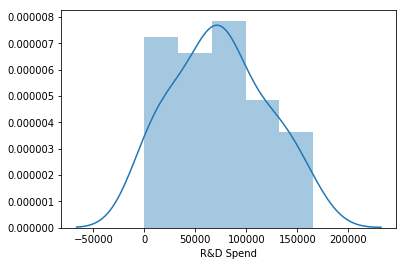

In [ ]:
import seaborn as sns
sns.distplot(data['R&D Spend'])

# Parametric Test
Applicable for Normally Distributed Data. Helps me to identify whether the given two FEATURE columns are Statistically Similar columns or not. If they are similar, we have a scope to eliminate one of the column

In [ ]:
# 50_Startups 
# Feature: R&D Spend, Admin Spend, Marketing --- All columns are normally distributed
# Label: Profit
# 
# To understand do we have any scope to eliminate similar features
#

In [ ]:
#
# Question: Is R&D Spend & Administration statistically similar features ?
#
# Hypoythesis Testing:
#
# Lets assume my SL is 0.05
#
# Null Hypothesis:       R&D Spend & Administration are NOT DIFFERENT : if calc_SL > assumed_SL
# Alternate Hypothesis:  R&D Spend & Administration are DIFFERENT : if calc_SL <= assumed_SL
#
#
#
# To perform the test of above hypothesis, we shall choose any/all of the given algo
# 1. Student t-test
# 2. Paired Student t-test
# 3. ANOVA


In [ ]:
# 1. Student t-test
from scipy.stats import ttest_ind
stats, pvalue = ttest_ind(data['R&D Spend'],data['Administration'])

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT")
else:
    print("Null hypothesis passed. R&D Spend & Administration are NOT DIFFERENT")

Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT


In [ ]:
# 2. Paired Student t-test
from scipy.stats import ttest_rel
stats, pvalue = ttest_rel(data['R&D Spend'],data['Administration'])

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT")
else:
    print("Null hypothesis passed. R&D Spend & Administration are NOT DIFFERENT")

Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT


In [ ]:
# 3. ANOVA
from scipy.stats import f_oneway
stats, pvalue = f_oneway(data['R&D Spend'],data['Administration'])

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT")
else:
    print("Null hypothesis passed. R&D Spend & Administration are NOT DIFFERENT")

Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT


# Non Parametric test
Applicable for Non-gaussian Data. Helps me to identify whether the given two FEATURE columns are Statistically Similar columns or not. If they are similar, we have a scope to eliminate one of the column

In [ ]:
# 50_Startups 
# Feature: R&D Spend, Admin Spend, Marketing --- All columns are not having normal distribution
# Label: Profit
# 
# To understand do we have any scope to eliminate similar features
#

In [ ]:
#
# Question: Is R&D Spend & Administration statistically similar features ?
#
# Hypoythesis Testing:
#
# Lets assume my SL is 0.05
#
# Null Hypothesis:       R&D Spend & Administration are NOT DIFFERENT : if calc_SL > assumed_SL
# Alternate Hypothesis:  R&D Spend & Administration are DIFFERENT : if calc_SL <= assumed_SL
#
#
#
# To perform the test of above hypothesis, we shall choose any/all of the given algo
# 1. Wilcoxon Test
# 2. Mann Whitney U test
# 3. Kruskal Wallis H test
# 4. Friedman test


In [ ]:
# 1. Wilcoxon Test
from scipy.stats import wilcoxon
stats, pvalue = wilcoxon(data['R&D Spend'],data['Administration'])

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT")
else:
    print("Null hypothesis passed. R&D Spend & Administration are NOT DIFFERENT")

Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT


In [ ]:
# 2. Mann Whitney U test
from scipy.stats import mannwhitneyu
stats, pvalue = mannwhitneyu(data['R&D Spend'],data['Administration'])

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT")
else:
    print("Null hypothesis passed. R&D Spend & Administration are NOT DIFFERENT")

Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT


In [ ]:
# 3. Kruskal Wallis H test
from scipy.stats import kruskal
stats, pvalue = kruskal(data['R&D Spend'],data['Administration'])

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT")
else:
    print("Null hypothesis passed. R&D Spend & Administration are NOT DIFFERENT")

Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT


In [ ]:
#4. Friedman test -- For more than 2 columns check
from scipy.stats import friedmanchisquare
stats, pvalue = friedmanchisquare(data['R&D Spend'],data['Administration'], data['Marketing Spend'])

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT")
else:
    print("Null hypothesis passed. R&D Spend & Administration are NOT DIFFERENT")

Alternate Hypothesis passed. R&D Spend & Administration are DIFFERENT


# Chi-square Test 
Chi-square test defines whether the two variables(One Feature and One Label) have any kind of relationship or not.
We need to use Chi-square when one of the situation arises:

1. Feature (Categorical) and Label (Numerical)
2. Feature (Numerical) and Label (Categorical)
3. Feature (Categorical) and Label (Categorical)

In [ ]:
# To implement CHi-square you need to ensure to create Contigency Table


In [ ]:
# 50_Startups 
# Feature: R&D Spend, Admin Spend, Marketing, State --- All columns are not having normal distribution
# Label: Profit

In [ ]:
# Question: Do State and Profit have any linear relationship?
# 
# Hypoythesis Testing:
#
# Lets assume my SL is 0.05
#
# Null Hypothesis:       State and Profit doesnot have  Relationship : if calc_SL > assumed_SL
# Alternate Hypothesis:  State and Profit have Relationship : if calc_SL <= assumed_SL
#
#
#
# To perform the test of above hypothesis, we shall choose any/all of the given algo
# 1. Chi-square Test

In [ ]:
#Create Contigency Table for State column and profit Col
ct = pd.crosstab(data['State'],data['Profit'])
ct

Profit,14681.4,35673.41,42559.73,49490.75,64926.08,65200.33,69758.98,71498.49,77798.83,78239.91,...,149759.96,152211.77,155752.6,156122.51,156991.12,166187.94,182901.99,191050.39,191792.06,192261.83
State,,,,,,,,,,,,,,,,,,,,,
California,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
Florida,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
New York,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. State and Profit have Relationship")
else:
    print("Null hypothesis passed. State and Profit doesnot have  Relationship")

Null hypothesis passed. State and Profit doesnot have  Relationship
